In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
Data = '/content/drive/MyDrive/office_churn_dataset.csv'
dundermifflin = pd.read_csv(Data)

In [ ]:
dundermifflin.head()

,EmployeeID,Branch,Tenure,Salary,Department,JobSatisfaction,WorkLifeBalance,CommuteDistance,MaritalStatus,Education,PerformanceRating,TrainingHours,OverTime,NumProjects,YearsSincePromotion,EnvironmentSatisfaction,ChurnLikelihood
0,1,San Francisco,4.0,63000.0,Legal,3.0,3.0,Long,Married,High School,3.000000,88.0,True,3.0,0.0,2.0,Highly Likely to Churn
1,2,Chicago,14.0,72000.0,Accounting,4.0,4.0,Short,Single,Bachelor,3.666667,30.0,True,3.0,2.0,3.0,Moderately Likely to Churn
2,3,Miami,4.0,40000.0,Quality Assurance,3.0,3.0,Medium,Single,High School,3.666667,64.0,NaN,NaN,0.0,4.0,Highly Likely to Churn
3,4,Scranton,2.0,55000.0,Legal,3.0,3.5,Short,Married,Bachelor,3.666667,30.0,True,4.0,0.0,3.0,Moderately Likely to Churn
4,5,Scranton,10.0,55500.0,Legal,3.0,3.0,Medium,Married,Bachelor,3.333333,18.0,NaN,4.0,1.0,3.0,Moderately Likely to Churn


In [ ]:
#converting the OverTime in 0 and 1 instead of True/NaN

dundermifflin['OverTime'] = dundermifflin['OverTime'].fillna(0)
dundermifflin['OverTime'] = dundermifflin['OverTime'].replace(True, 1)

In [ ]:
dundermifflin.isna().sum()

EmployeeID                   0
Branch                       8
Tenure                       9
Salary                       9
Department                   0
JobSatisfaction             28
WorkLifeBalance             28
CommuteDistance              0
MaritalStatus                0
Education                    0
PerformanceRating            7
TrainingHours              191
OverTime                     0
NumProjects                 99
YearsSincePromotion          1
EnvironmentSatisfaction     28
ChurnLikelihood              0
dtype: int64

In [ ]:
dundermifflin = dundermifflin.dropna(subset = ['Branch'])

In [ ]:
#filling out the missing values with the means

columns_to_fill = ['Tenure', 'Salary', 'JobSatisfaction', 'WorkLifeBalance', 'PerformanceRating', 'TrainingHours', 'NumProjects', 'YearsSincePromotion', 'EnvironmentSatisfaction']

dundermifflin[columns_to_fill] = dundermifflin[columns_to_fill].apply(lambda col: col.fillna(col.mean()))

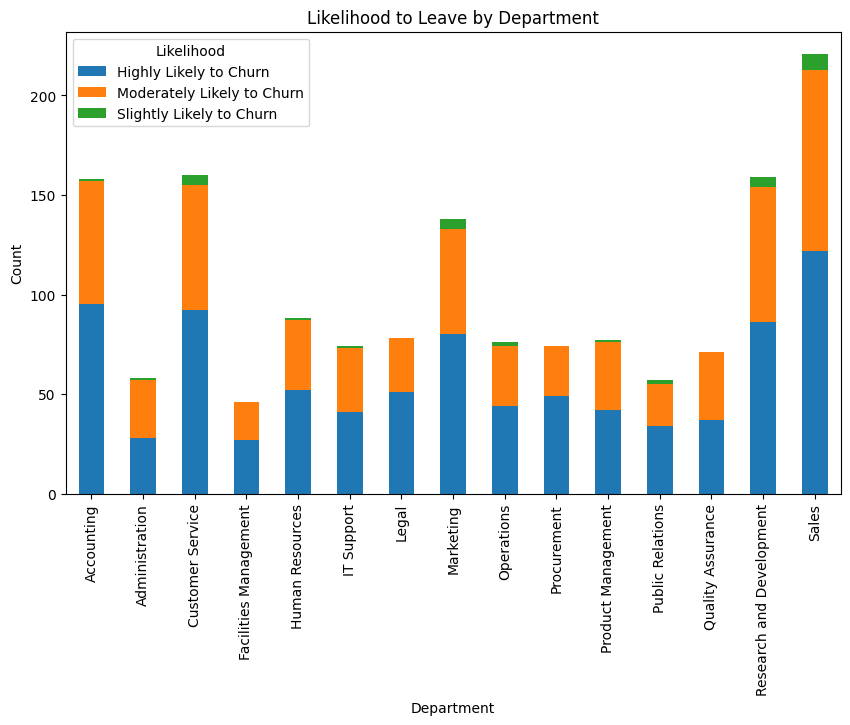

In [ ]:
churn_by_department = dundermifflin[['Department', 'ChurnLikelihood']]

count_churn_by_department = churn_by_department.groupby(['Department', 'ChurnLikelihood']).size().unstack(fill_value = 0)

count_churn_by_department.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Likelihood to Leave by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Likelihood')

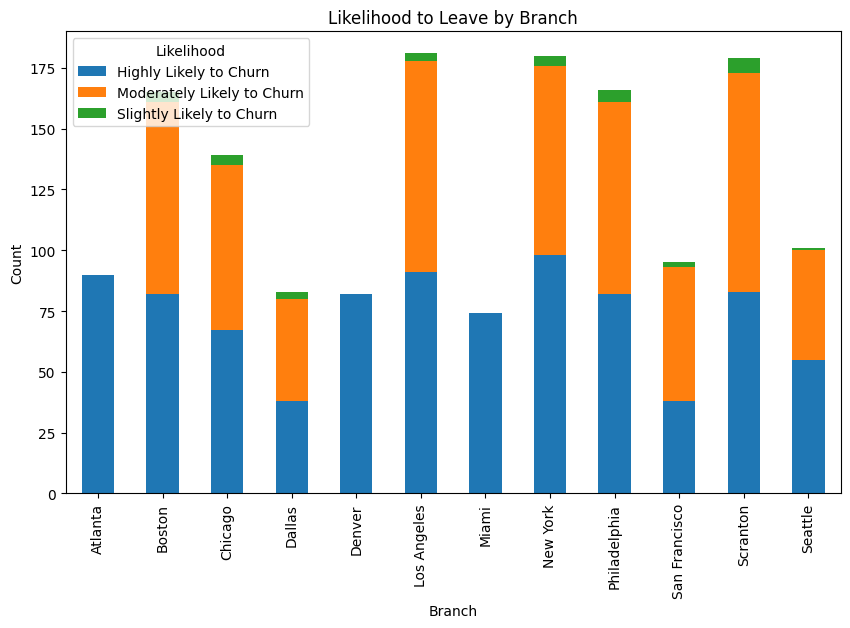

In [ ]:
churn_by_branch = dundermifflin[['Branch', 'ChurnLikelihood']]

count_churn_by_branch = churn_by_branch.groupby(['Branch', 'ChurnLikelihood']).size().unstack(fill_value = 0)

count_churn_by_branch.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Likelihood to Leave by Branch')
plt.xlabel('Branch')
plt.ylabel('Count')
plt.legend(title='Likelihood')

In [ ]:
#getting dummies for education, commute, and marital status

education_dummies = pd.get_dummies(dundermifflin['Education'], prefix = 'Education')
dundermifflin = pd.concat([dundermifflin, education_dummies], axis = 1)

commute_dummies = pd.get_dummies(dundermifflin['CommuteDistance'], prefix = 'CommuteDistance')
dundermifflin = pd.concat([dundermifflin, commute_dummies], axis = 1)

marital_dummies = pd.get_dummies(dundermifflin['MaritalStatus'], prefix = 'MaritalStatus')
dundermifflin = pd.concat([dundermifflin, marital_dummies], axis = 1)

churn_dummies = pd.get_dummies(dundermifflin['ChurnLikelihood'], prefix = 'ChurnLikelihood')
dundermifflin = pd.concat([dundermifflin, churn_dummies], axis = 1)

In [ ]:
dundermifflin.head()

,EmployeeID,Branch,Tenure,Salary,Department,JobSatisfaction,WorkLifeBalance,CommuteDistance,MaritalStatus,Education,...,Education_Master,CommuteDistance_Long,CommuteDistance_Medium,CommuteDistance_Short,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,ChurnLikelihood_Highly Likely to Churn,ChurnLikelihood_Moderately Likely to Churn,ChurnLikelihood_Slightly Likely to Churn
0,1,San Francisco,4.0,63000.0,Legal,3.0,3.0,Long,Married,High School,...,0,1,0,0,0,1,0,1,0,0
1,2,Chicago,14.0,72000.0,Accounting,4.0,4.0,Short,Single,Bachelor,...,0,0,0,1,0,0,1,0,1,0
2,3,Miami,4.0,40000.0,Quality Assurance,3.0,3.0,Medium,Single,High School,...,0,0,1,0,0,0,1,1,0,0
3,4,Scranton,2.0,55000.0,Legal,3.0,3.5,Short,Married,Bachelor,...,0,0,0,1,0,1,0,0,1,0
4,5,Scranton,10.0,55500.0,Legal,3.0,3.0,Medium,Married,Bachelor,...,0,0,1,0,0,1,0,0,1,0


In [ ]:
#calculating the number of employees per each department that are Highly likely to churn

churn_counts = dundermifflin[dundermifflin['ChurnLikelihood_Highly Likely to Churn'] == 1].groupby('Department')['ChurnLikelihood_Highly Likely to Churn'].count()

In [ ]:
churn_counts

Department
Accounting                   95
Administration               28
Customer Service             92
Facilities Management        27
Human Resources              52
IT Support                   41
Legal                        51
Marketing                    80
Operations                   44
Procurement                  49
Product Management           42
Public Relations             34
Quality Assurance            37
Research and Development     86
Sales                       122
Name: ChurnLikelihood_Highly Likely to Churn, dtype: int64

In [ ]:
unique_employee_counts = dundermifflin.groupby('Department')['EmployeeID'].nunique()

In [ ]:
unique_employee_counts

Department
Accounting                  158
Administration               58
Customer Service            160
Facilities Management        46
Human Resources              88
IT Support                   74
Legal                        78
Marketing                   138
Operations                   76
Procurement                  74
Product Management           77
Public Relations             57
Quality Assurance            71
Research and Development    159
Sales                       221
Name: EmployeeID, dtype: int64

In [ ]:
#calculating the number of employees per each branch that are Highly likely to churn

churn_branch = dundermifflin[dundermifflin['ChurnLikelihood_Highly Likely to Churn'] == 1].groupby('Branch')['ChurnLikelihood_Highly Likely to Churn'].count()
churn_branch

Branch
Atlanta          90
Boston           82
Chicago          67
Dallas           38
Denver           82
Los Angeles      91
Miami            74
New York         98
Philadelphia     82
San Francisco    38
Scranton         83
Seattle          55
Name: ChurnLikelihood_Highly Likely to Churn, dtype: int64

In [ ]:
branch_employee_counts = dundermifflin.groupby('Branch')['EmployeeID'].nunique()
branch_employee_counts

Branch
Atlanta           90
Boston           165
Chicago          139
Dallas            83
Denver            82
Los Angeles      181
Miami             74
New York         180
Philadelphia     166
San Francisco     95
Scranton         179
Seattle          101
Name: EmployeeID, dtype: int64

In [ ]:
#downloading for further analysis in power bi

dundermifflin.to_csv('/content/drive/My Drive/dundermifflin.csv', index=False)
files.download('/content/drive/My Drive/dundermifflin.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#encoding the likelihood to leave for regression

outcome = dundermifflin['ChurnLikelihood']
encoder = OrdinalEncoder(categories = [['Slightly Likely to Churn', 'Moderately Likely to Churn','Highly Likely to Churn']])
outcome_encoded = encoder.fit_transform(outcome.values.reshape(-1, 1)).flatten()

Model 1: Logistic Regression without considering Branches and Departments

In [ ]:
predictors = dundermifflin.drop(['ChurnLikelihood', 'EmployeeID', 'Branch', 'Department', 'Education', 'CommuteDistance', 'MaritalStatus'], axis=1)

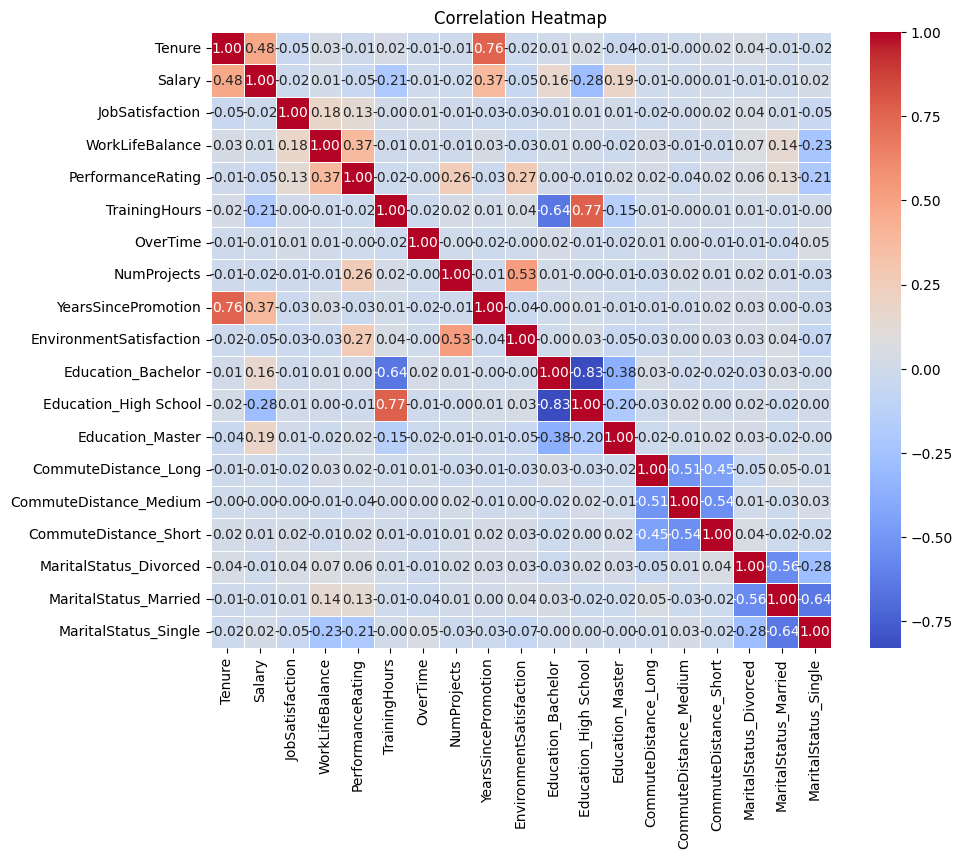

In [ ]:
correlation_matrix = predictors.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.6)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(predictors, outcome_encoded, test_size=0.3, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
coefficients_df = pd.DataFrame({'Variable': predictors.columns, 'Coefficient': model.coef_[0]})
print(coefficients_df)
print("Intercept:", model.intercept_)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, predictions))

                   Variable   Coefficient
0                    Tenure -3.300557e-09
1                    Salary -3.049639e-05
2           JobSatisfaction -1.353909e-09
3           WorkLifeBalance -1.733904e-09
4         PerformanceRating -1.536688e-09
5             TrainingHours -1.870579e-08
6                  OverTime -4.556836e-10
7               NumProjects -1.419505e-09
8       YearsSincePromotion -6.442026e-10
9   EnvironmentSatisfaction -6.622792e-10
10       Education_Bachelor -2.527807e-10
11    Education_High School -1.893344e-10
12         Education_Master -3.859651e-11
13     CommuteDistance_Long -1.594582e-10
14   CommuteDistance_Medium -1.942902e-10
15    CommuteDistance_Short -1.269632e-10
16   MaritalStatus_Divorced -6.282254e-11
17    MaritalStatus_Married -2.843389e-10
18     MaritalStatus_Single -1.335502e-10
Intercept: [-4.80711608e-10  1.83650360e-10  2.97061248e-10]
Accuracy: 0.5509761388286334
Classification Report:
              precision    recall  f1-score   s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<ipython-input-103-7d70e65f9d38>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  coefficients_filtered = coefficients_filtered[coefficients['Variable'] != 'TrainingHours']
<ipython-input-103-7d70e65f9d38>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  coefficients_filtered = coefficients_filtered[coefficients['Variable'] != 'Tenure']
<ipython-input-103-7d70e65f9d38>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Variable', data=coefficients_filtered, orient='h', palette='coolwarm')


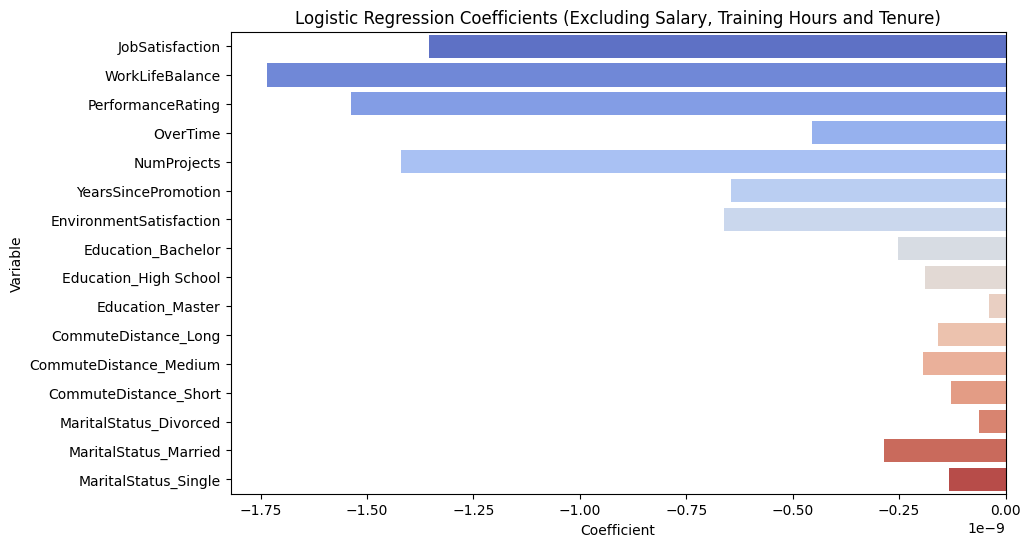

In [ ]:
coefficients = pd.DataFrame({'Variable': predictors.columns, 'Coefficient': model.coef_[0]})
coefficients_filtered = coefficients[coefficients['Variable'] != 'Salary']
coefficients_filtered = coefficients_filtered[coefficients['Variable'] != 'TrainingHours']
coefficients_filtered = coefficients_filtered[coefficients['Variable'] != 'Tenure']

#salary, training hours and tenure excluded because the numbers are too big comparing to others, they are the strongest predictors though

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Variable', data=coefficients_filtered, orient='h', palette='coolwarm')
plt.title('Logistic Regression Coefficients (Excluding ' + 'Salary, Training Hours and Tenure' +')')
plt.show()

Exploring the most significant variables

<ipython-input-96-b7f8f7865d25>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Salary', data=dundermifflin, palette='viridis')


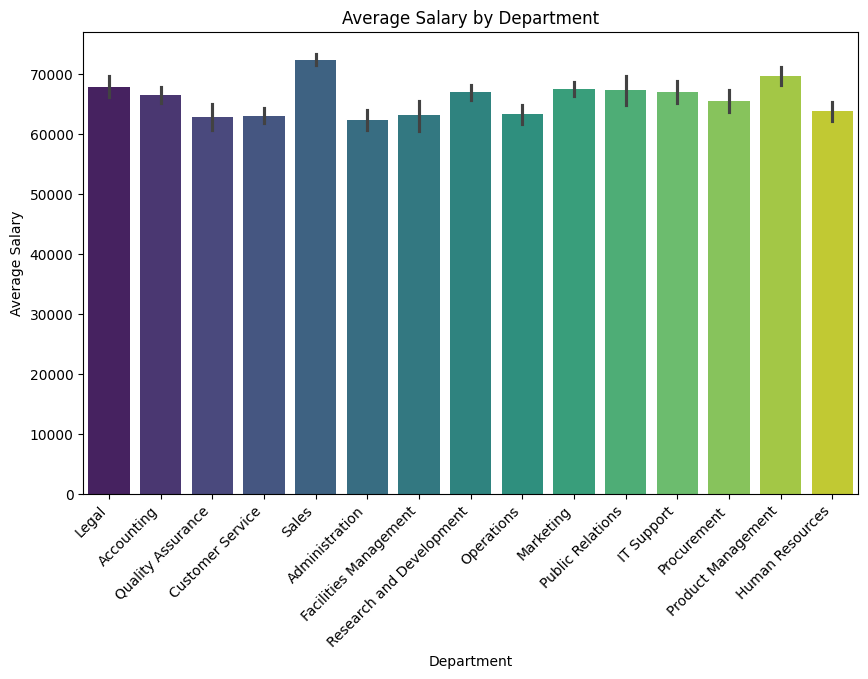

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Department', y='Salary', data=dundermifflin, palette='viridis')
plt.title('Average Salary by Department')
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-97-1fcb51f97922>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Branch', y='Salary', data=dundermifflin, palette='viridis')


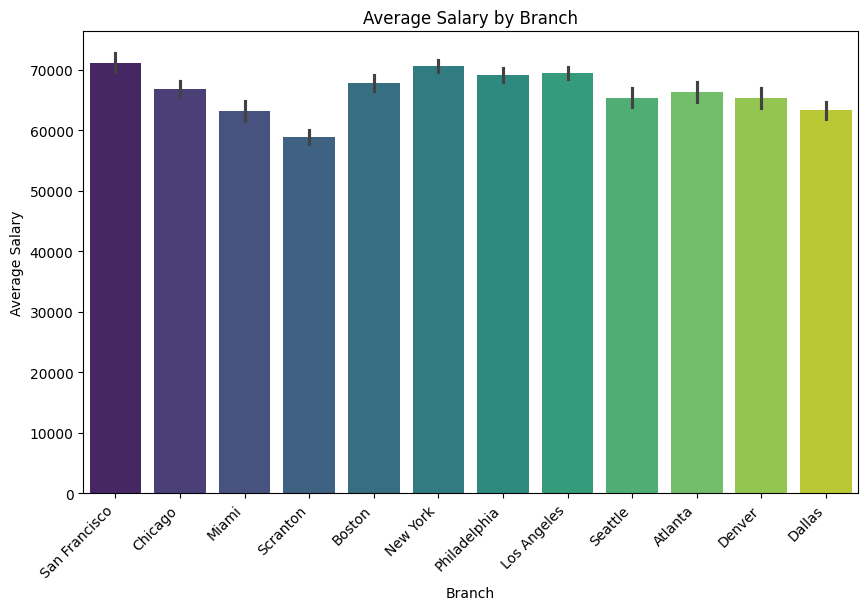

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Branch', y='Salary', data=dundermifflin, palette='viridis')
plt.title('Average Salary by Branch')
plt.xlabel('Branch')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-98-61aa2e8e7aad>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='TrainingHours', data=dundermifflin, palette='viridis')


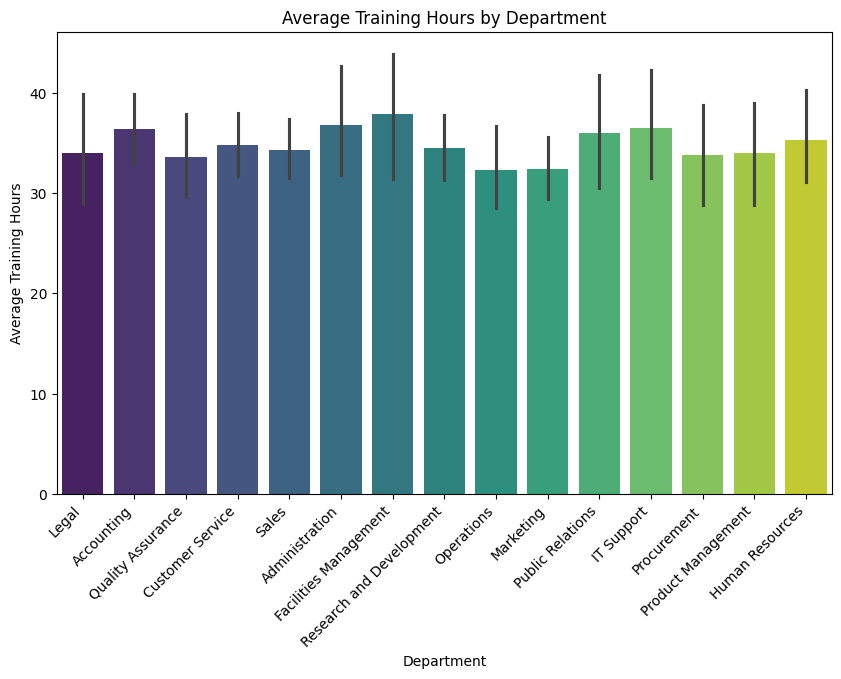

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Department', y='TrainingHours', data=dundermifflin, palette='viridis')
plt.title('Average Training Hours by Department')
plt.xlabel('Department')
plt.ylabel('Average Training Hours')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-99-b70054655549>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Branch', y='TrainingHours', data=dundermifflin, palette='viridis')


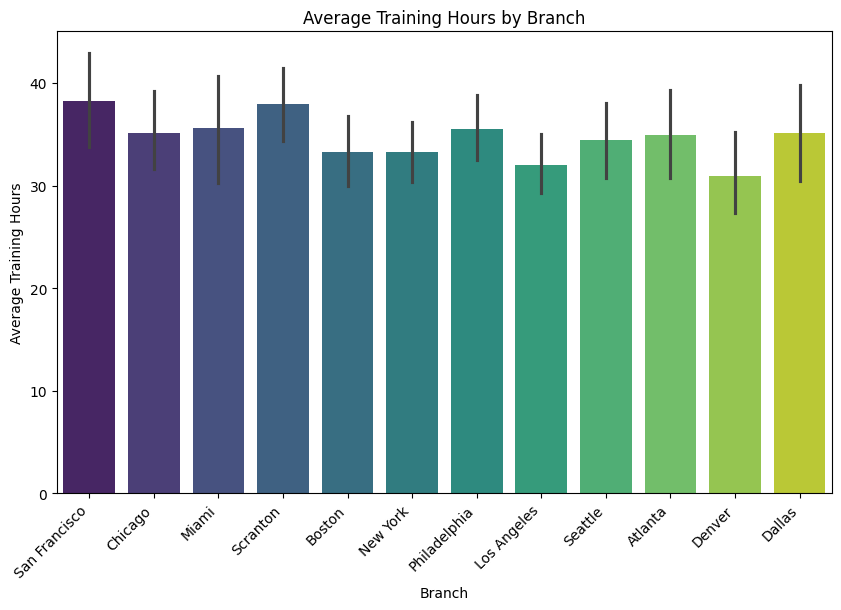

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Branch', y='TrainingHours', data=dundermifflin, palette='viridis')
plt.title('Average Training Hours by Branch')
plt.xlabel('Branch')
plt.ylabel('Average Training Hours')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-100-4094e7002d41>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Tenure', data=dundermifflin, palette='viridis')


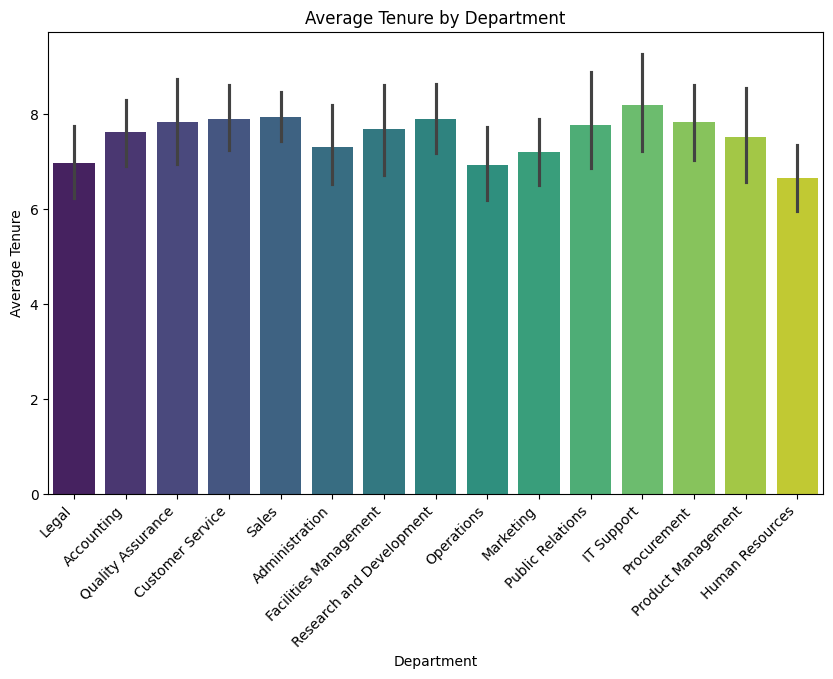

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Department', y='Tenure', data=dundermifflin, palette='viridis')
plt.title('Average Tenure by Department')
plt.xlabel('Department')
plt.ylabel('Average Tenure')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-101-53ad0d1ed9f1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Branch', y='Tenure', data=dundermifflin, palette='viridis')


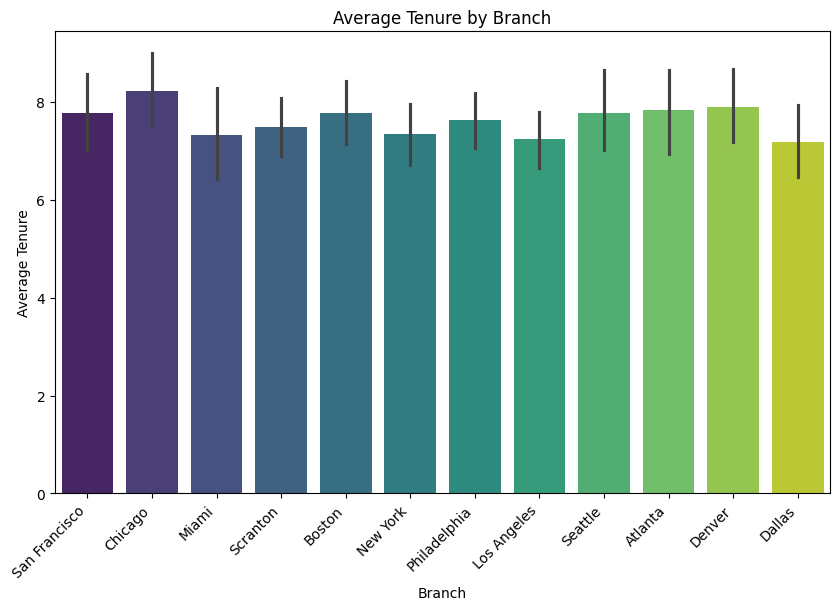

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Branch', y='Tenure', data=dundermifflin, palette='viridis')
plt.title('Average Tenure by Branch')
plt.xlabel('Branch')
plt.ylabel('Average Tenure')
plt.xticks(rotation=45, ha='right')
plt.show()